<a href="https://colab.research.google.com/github/aiformankind/gun-detection/blob/main/Gun_Rifle_Detection_YOLOv5_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Kids* should be safe when going to schools. AI For Mankind wants to build and deploy gun detection system to local schools in California.

In this notebook, AI For Mankind built a gun and rifle detection model using Yolov5 (You Only Look Once).

Please feel free to improve the notebook and contribute it back. 
Repo: https://github.com/aiformankind/gun-detection


Learn more about [AI For Mankind](https://aiformankind.org/).

For more information about Ultralytics Yolov5 please visit https://github.com/ultralytics/yolov5 and https://www.ultralytics.com.

Learning Resources
1. [Yolo Object Detection (Part 1)](https://youtu.be/2hAiJe8ITsE)

# Setup

Download and upload the [gun detection train dataset (fire_gun_rifle_v1.zip)](https://drive.google.com/file/d/1zFf0GhWEKcDQgRO1LzUjAbZNFTqlImHY/view?usp=sharing) to your Google Drive. 

AI For Mankind combines the following datasets into the above one consolidated train dataset.

1.   [Hand, gun and phone dataset](https://www.researchgate.net/profile/Cuauhtemoc-Suarez-Ramirez-3/publication/356339851_TYolov5_A_Temporal_Yolov5_Detector_Based_on_Quasi-Recurrent_Neural_Networks_for_Real-Time_Handgun_Detection_in_Video) prepared by  
Mario Alberto Duran-Vega, 
Miguel Gonzalez-Mendoza, 
Leonardo Chang, 
Cuauhtemoc Suarez-Ramirez, the authors of [TYolov5: A Temporal Yolov5 Detector Based on Quasi-Recurrent Neural Networks for Real-Time Handgun Detection in Video](https://www.researchgate.net/publication/356339851_TYolov5_A_Temporal_Yolov5_Detector_Based_on_Quasi-Recurrent_Neural_Networks_for_Real-Time_Handgun_Detection_in_Video)


2.   [Rifle, gun and fire dataset](https://www.kaggle.com/datasets/atulyakumar98/fire-and-gun-dataset) prepared by Atulya Kumar



Next, mount your Google Drive to access the train images.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Your google drive is mapped as ("/content/drive/MyDrive")

In [ ]:
!ls

drive  sample_data


In [ ]:
!ls /content/drive/MyDrive/fire_gun_rifle_v1.zip


/content/drive/MyDrive/fire_gun_rifle_v1.zip


Unzip the train dataset, fire_gun_rifle_v1.zip

In [ ]:
!unzip /content/drive/MyDrive/fire_gun_rifle_v1.zip

Streaming output truncated to the last 5000 lines.
  inflating: fire_gun_rifle_v1/train/small (77).jpg  
  inflating: __MACOSX/fire_gun_rifle_v1/train/._small (77).jpg  
  inflating: fire_gun_rifle_v1/train/small (77).txt  
  inflating: __MACOSX/fire_gun_rifle_v1/train/._small (77).txt  
  inflating: fire_gun_rifle_v1/train/small (78).jpg  
  inflating: __MACOSX/fire_gun_rifle_v1/train/._small (78).jpg  
  inflating: fire_gun_rifle_v1/train/small (78).txt  
  inflating: __MACOSX/fire_gun_rifle_v1/train/._small (78).txt  
  inflating: fire_gun_rifle_v1/train/small (79).jpg  
  inflating: __MACOSX/fire_gun_rifle_v1/train/._small (79).jpg  
  inflating: fire_gun_rifle_v1/train/small (79).txt  
  inflating: __MACOSX/fire_gun_rifle_v1/train/._small (79).txt  
  inflating: fire_gun_rifle_v1/train/small (80).jpg  
  inflating: __MACOSX/fire_gun_rifle_v1/train/._small (80).jpg  
  inflating: fire_gun_rifle_v1/train/small (80).txt  
  inflating: __MACOSX/fire_gun_rifle_v1/train/._small (80).txt

In [ ]:
!rm -rf __MACOSX/*

There are two directories train and val after unzip.

In [ ]:
!ls fire_gun_rifle_v1/

train  val


In this dataset, we use the following labels.

Label 0 for gun

Label 1 for fire

Label 2 for rifle

Clone yolov5 repo, install dependencies and check PyTorch and GPU.

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt  # install dependencies

import torch
from IPython.display import Image, clear_output  # to display images

clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Setup complete. Using torch 1.11.0+cu113 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15109MB, multi_processor_count=40)


In [ ]:
!ls /content/fire_gun_rifle_v1

train  val


Next we will copy the dataset to this /content/yolov5/fire_gun_rifle directory for training

In [ ]:
!mkdir /content/yolov5/fire_gun_rifle

In [ ]:
!cp -r /content/fire_gun_rifle_v1/* /content/yolov5/fire_gun_rifle/

In [ ]:
!ls /content/yolov5/fire_gun_rifle/

train  val


Download the data and model architecture [configs](https://drive.google.com/drive/folders/1UxqJ2y7Y3CNNJKPGyYhOTnY34svwHTD2?usp=sharing) (data_rifle.yaml + yolov5m_rifle.yaml) and upload the two config files to your Google Drive in a directory called fire_gun_rifle_config. (You have to create the fire_gun_rifle_config folder in your Google Drive)

In data_rifle.yaml, we specify the train, val test folders and nc is the number of classes.


![picture](https://drive.google.com/uc?export=view&id=1I__wOZFcDOOnklYPwWt-CZENPNV3UGbl)

There are several YOLOv5 model architectures: YOLOv5n (nano), YOLOv5s (small), YOLOv5m (medium), YOLOv5l (large), YOLOv5x (extra large). 

The model architecture configs provided by us have been updated to reflect the number of classes we want to detect. See below, nc: 3

![picture](https://drive.google.com/uc?export=view&id=1eelOPk5fR6QlspAENPrM6LKTVMj2SQ52)

Start the training

In [ ]:
!python train.py --img 1024 --batch 8 --epochs 60 \
    --data /content/drive/MyDrive/fire_gun_rifle_config/data_rifle.yaml --cfg /content/drive/MyDrive/fire_gun_rifle_config/yolov5m_rifle.yaml

train: weights=yolov5s.pt, cfg=/content/drive/MyDrive/HGP/yolov5m_rifle.yaml, data=/content/drive/MyDrive/HGP/data_rifle.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=60, batch_size=8, imgsz=1024, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-270-g6935a54 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw

You can find the trained model's weights here and save them to Google Drive.

In [ ]:
! ls runs/train/exp/weights/

best.pt  last.pt


In [ ]:
!cp runs/train/exp/weights/best.pt /content/drive/MyDrive/fire_gun_rifle/best-latest-combined-60.pt

Perform inference using the trained model

In [ ]:
!python detect.py --source /content/fire_gun_rifle_v1/val --weights '/content/best-latest-combined-60.pt' --img 1024 --conf 0.5 --save-txt

detect: weights=['/content/best-latest-combined-60.pt'], source=/content/fire_gun_rifle_v1/val, data=data/coco128.yaml, imgsz=[1024, 1024], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-289-g526e650 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5m_rifle summary: 316 layers, 21476712 parameters, 0 gradients, 51.2 GFLOPs
image 1/500 /content/fire_gun_rifle_v1/val/00d1e939c70f17f0.jpg: 704x1024 Done. (0.045s)
image 2/500 /content/fire_gun_rifle_v1/val/0113a550eac4f838d.jpg: 576x1024 Done. (0.041s)
image 3/500 /content/fire_gun_rifle_v1/val/01176ab5350931416.jpg: 704x1024 1 rifle, Done. (0.027s)
image 4/500 /content/fire_gun_rifle_v1/val/01185f8322c390

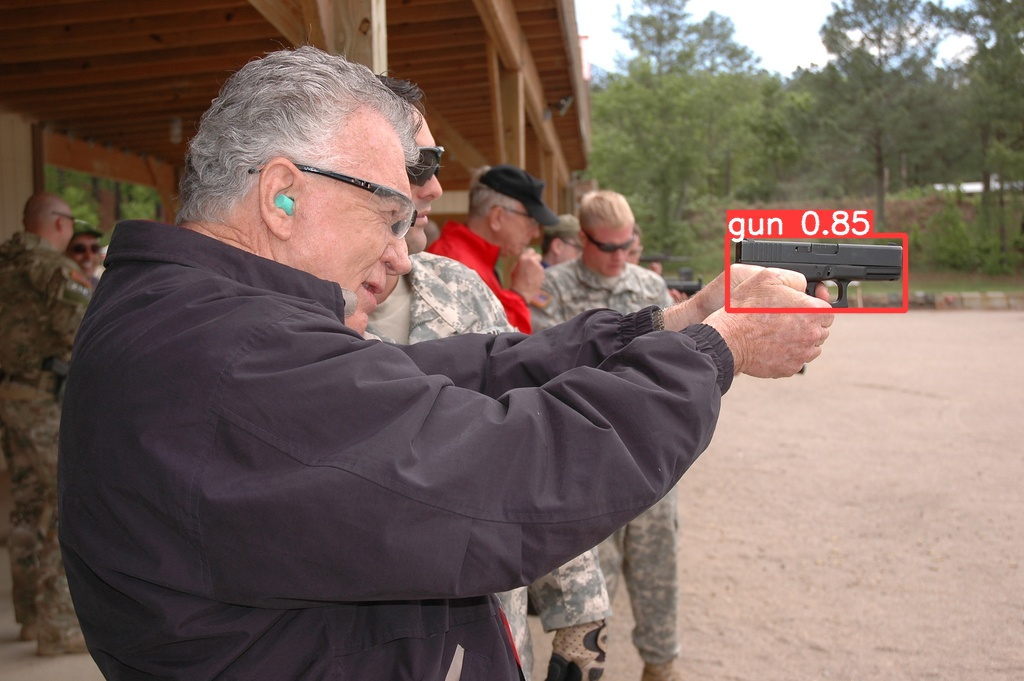

In [ ]:
Image(filename="runs/detect/exp3/1197aaf18b6f41f51.jpg", width=600)

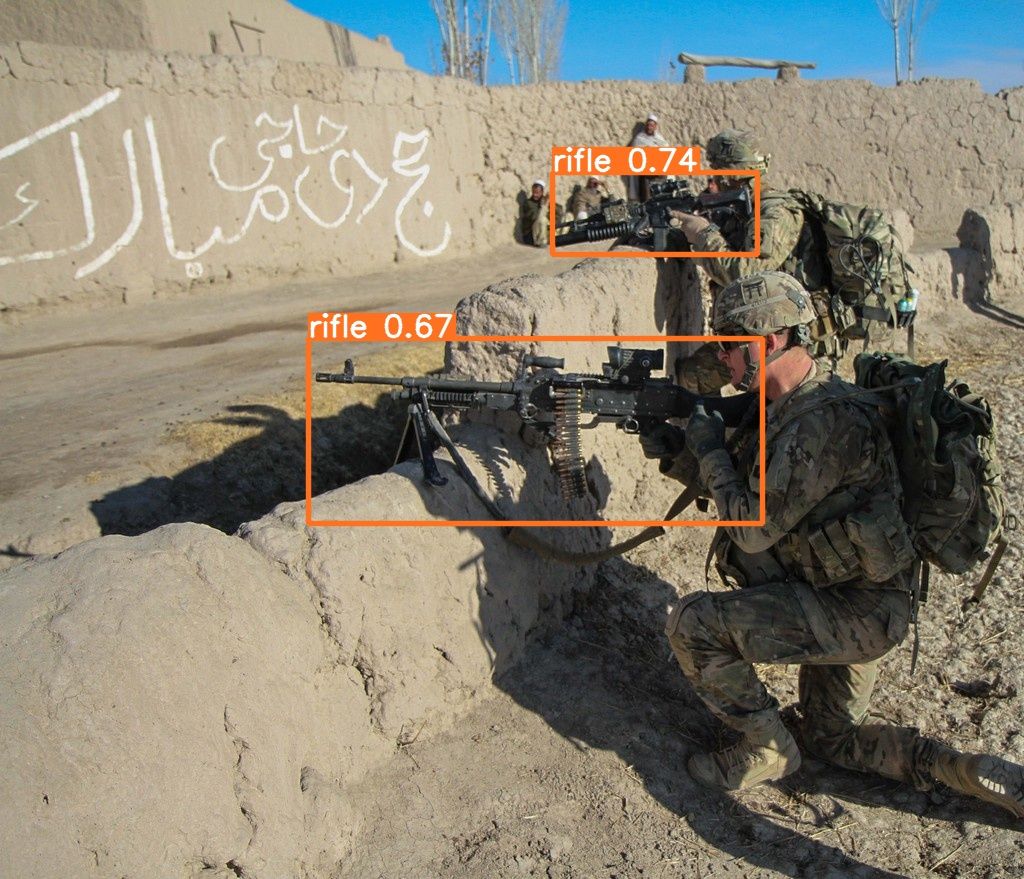

In [ ]:
Image(filename="runs/detect/exp3/313f4cb2943116269.jpg", width=600)

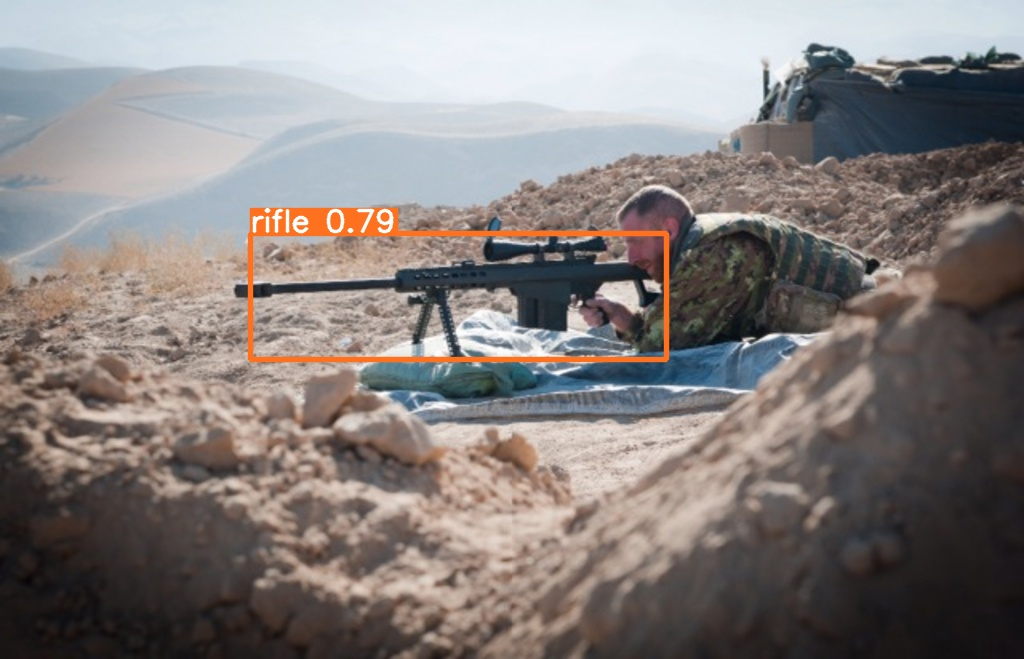

In [ ]:
Image(filename="runs/detect/exp3/71f48d203a4fe0841.jpg", width=600)

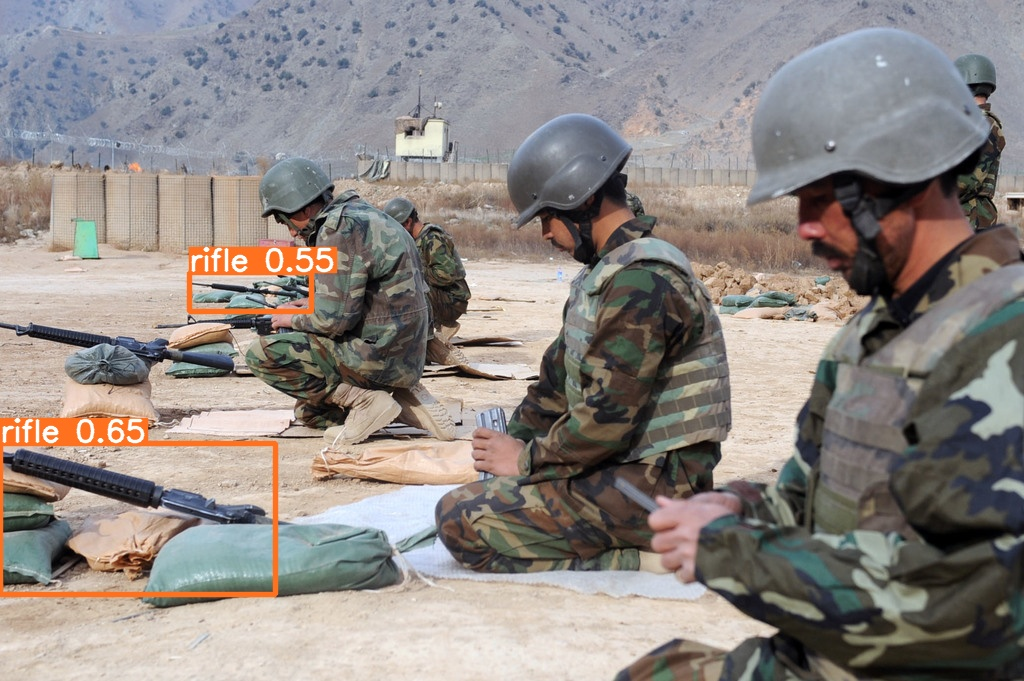

In [ ]:
Image(filename="runs/detect/exp3/b192087a934360927.jpg", width=600)

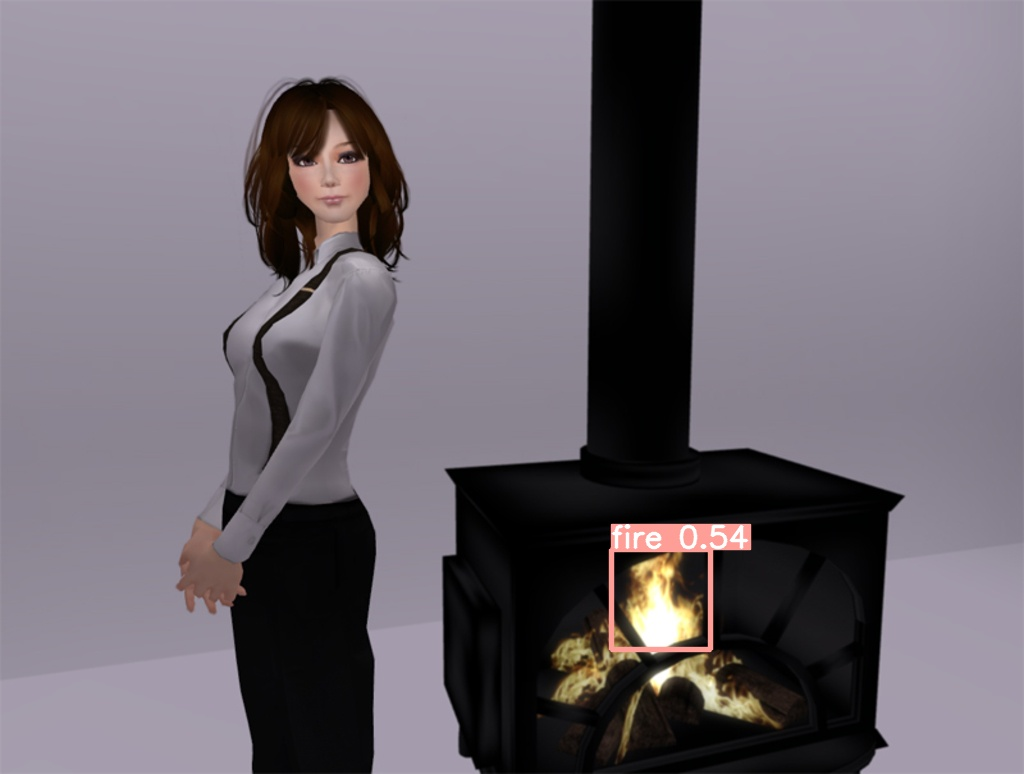

In [ ]:
Image(filename="runs/detect/exp3/9db60ec1aa0b5674.jpg", width=600)

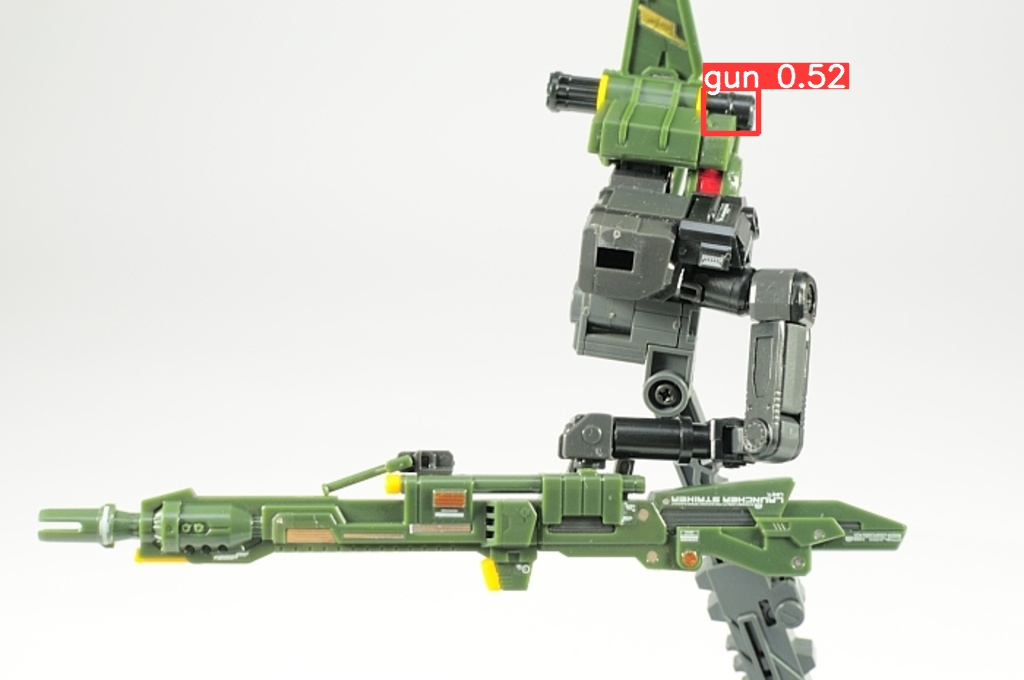

In [ ]:
Image(filename="runs/detect/exp3/51eab04238aa8d7c3.jpg", width=600)

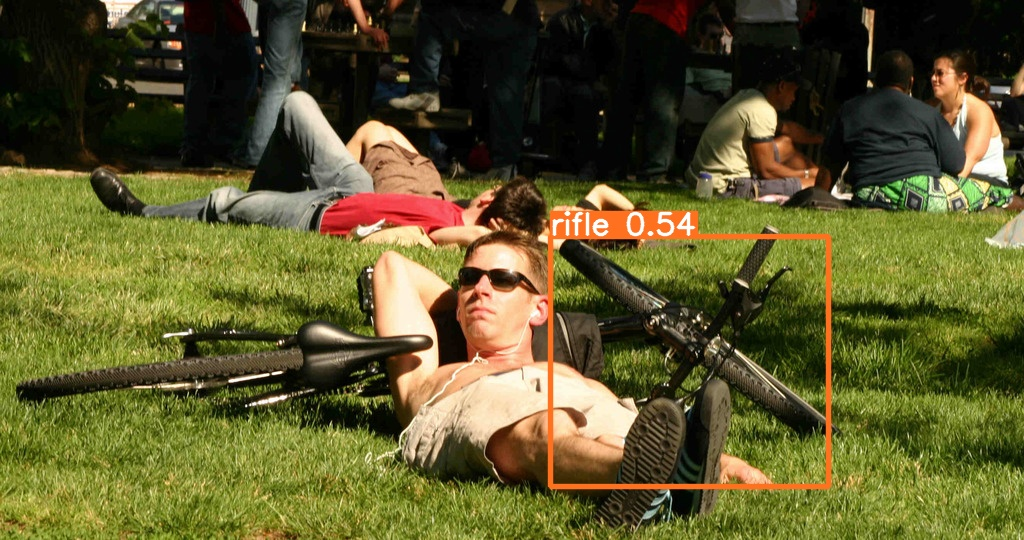

In [ ]:
Image(filename="runs/detect/exp3/51df3623220861847.jpg", width=600)

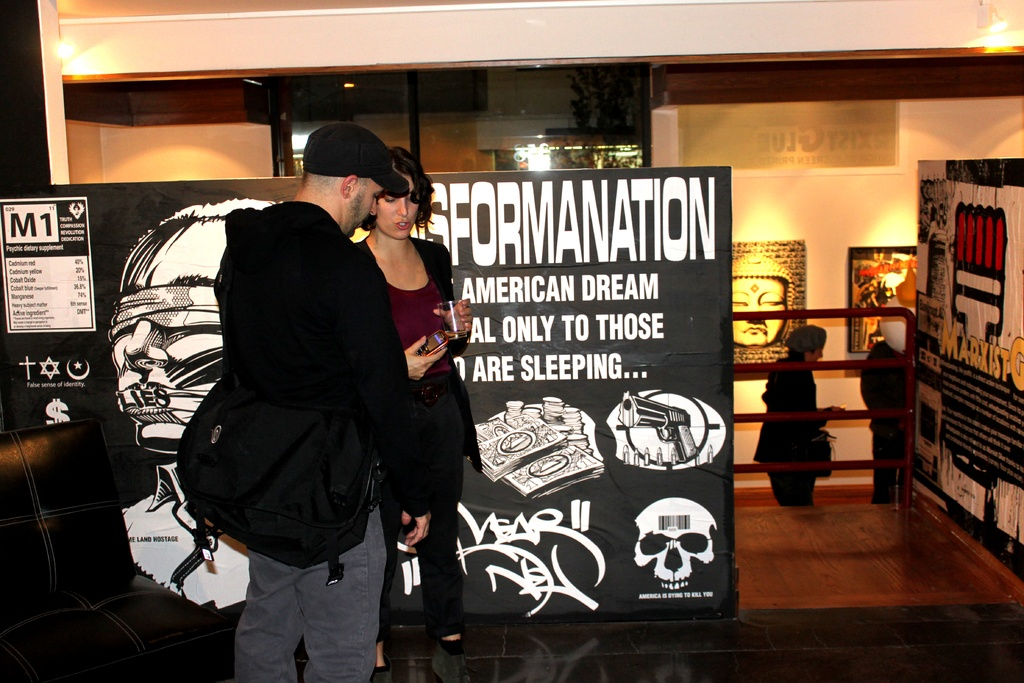

In [ ]:
Image(filename="runs/detect/exp3/1911d1921cbab06b.jpg", width=600)

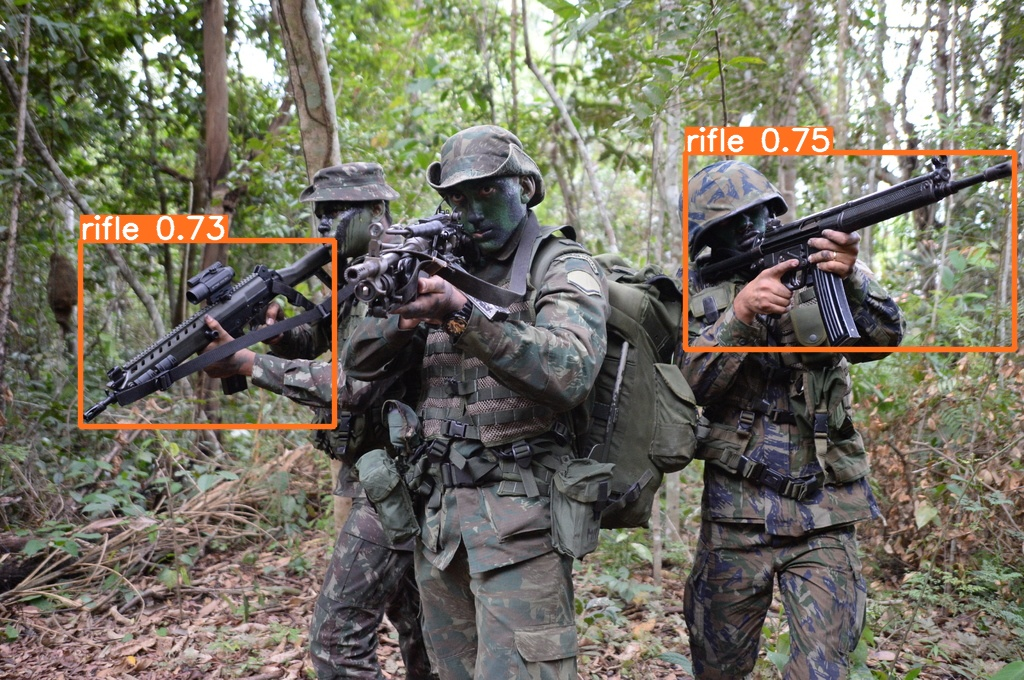

In [ ]:
Image(filename="runs/detect/exp3/31ec1d977643fa9b1.jpg", width=600)

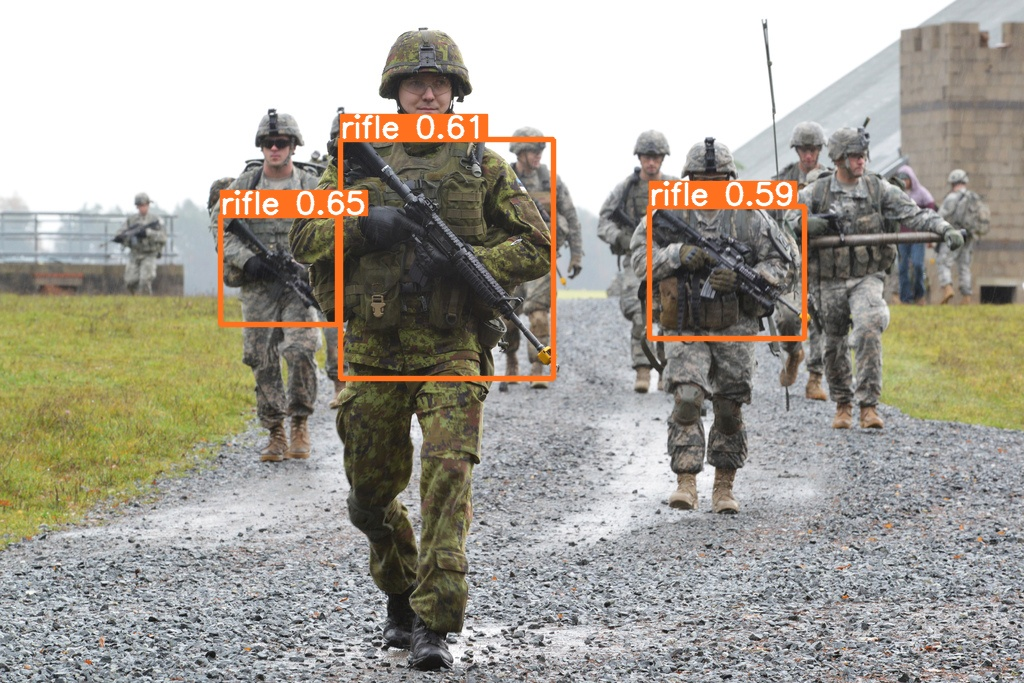

In [ ]:
Image(filename="runs/detect/exp3/1195be2c26d182780.jpg", width=600)

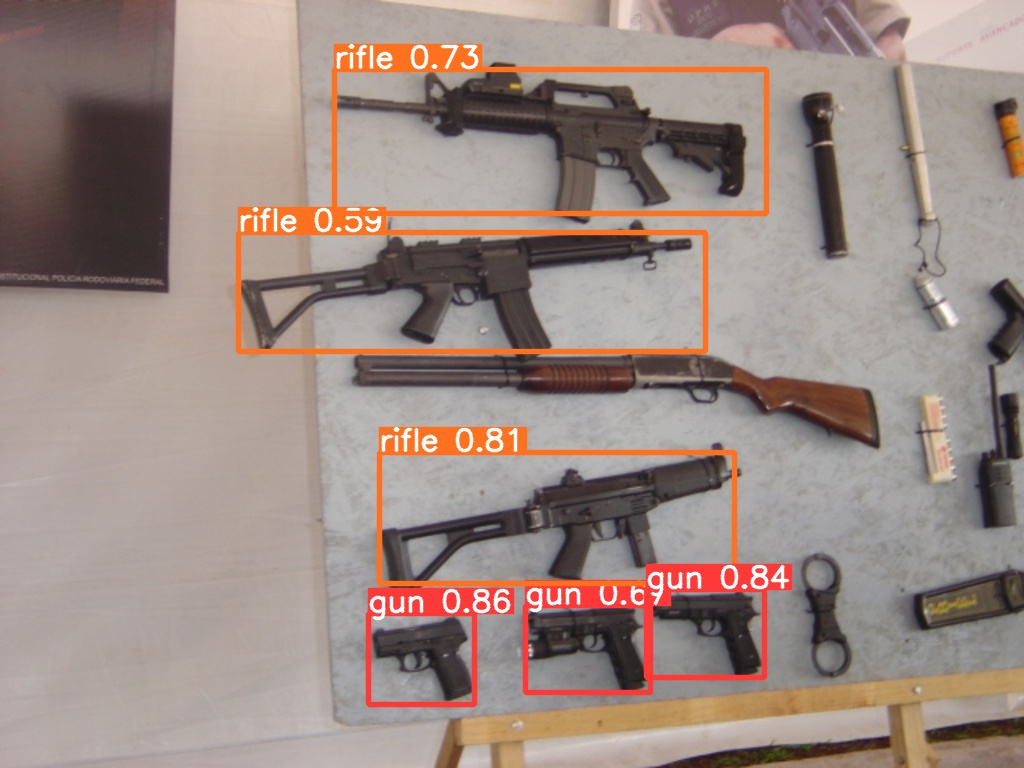

In [ ]:
Image(filename="runs/detect/exp3/0141ec0633447b467.jpg", width=600)

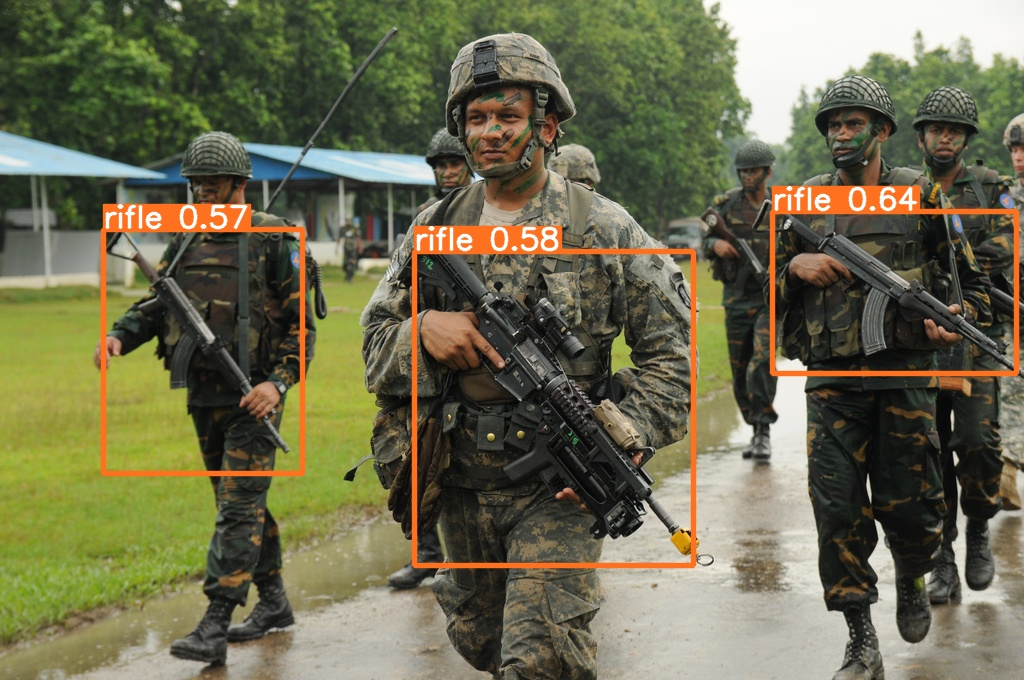

In [ ]:
Image(filename="runs/detect/exp3/01185f8322c3900c2.jpg", width=600)

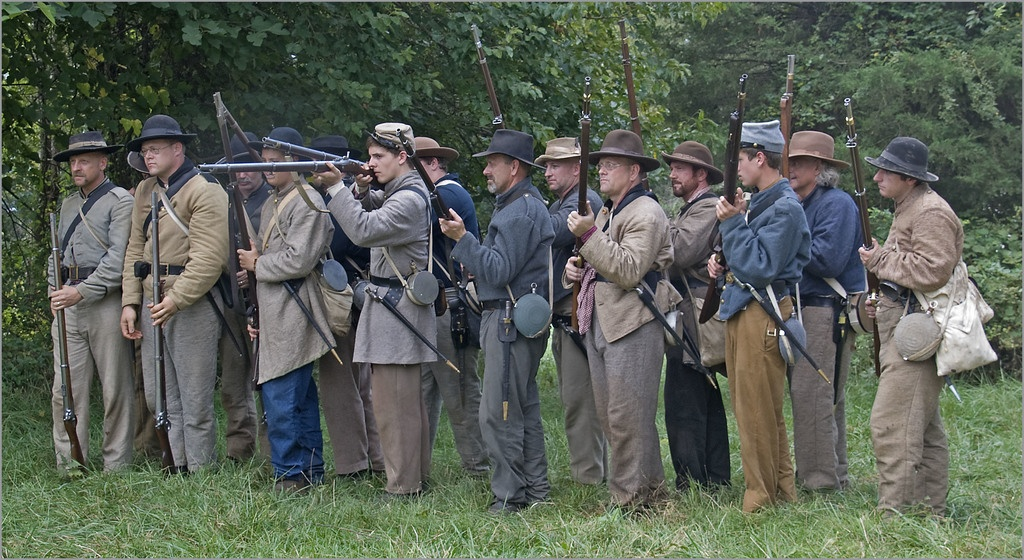

In [ ]:
Image(filename="runs/detect/exp3/0113a550eac4f838d.jpg", width=600)

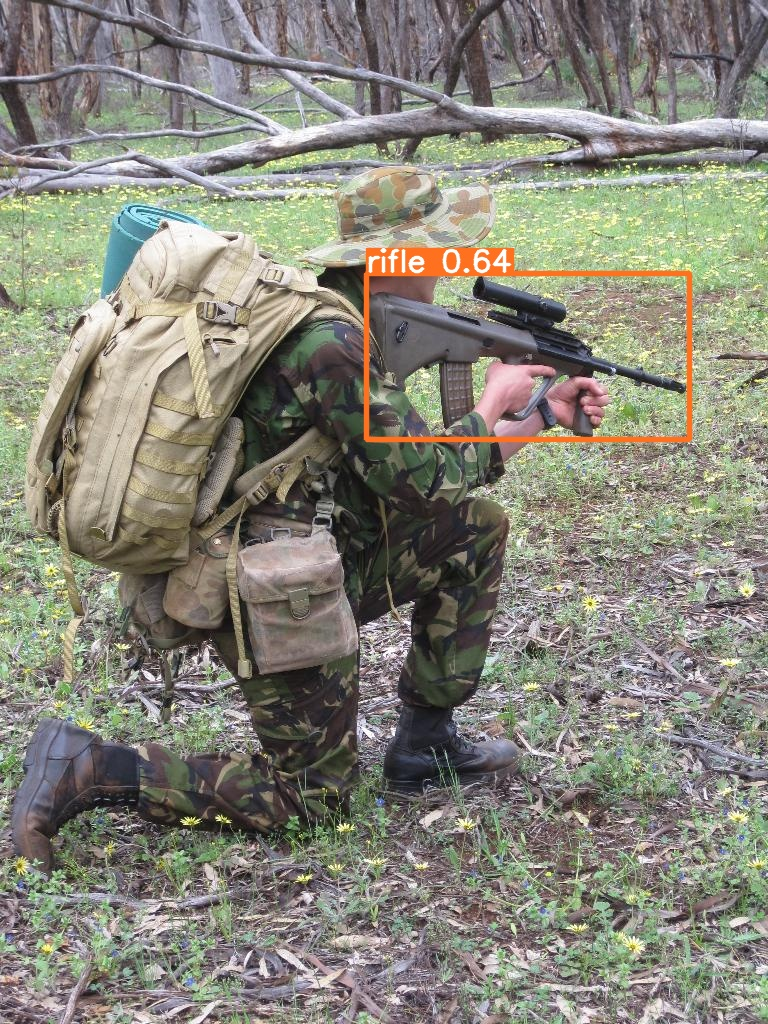

In [ ]:
Image(filename="runs/detect/exp3/112ef6bd3929ebf3e.jpg", width=600)

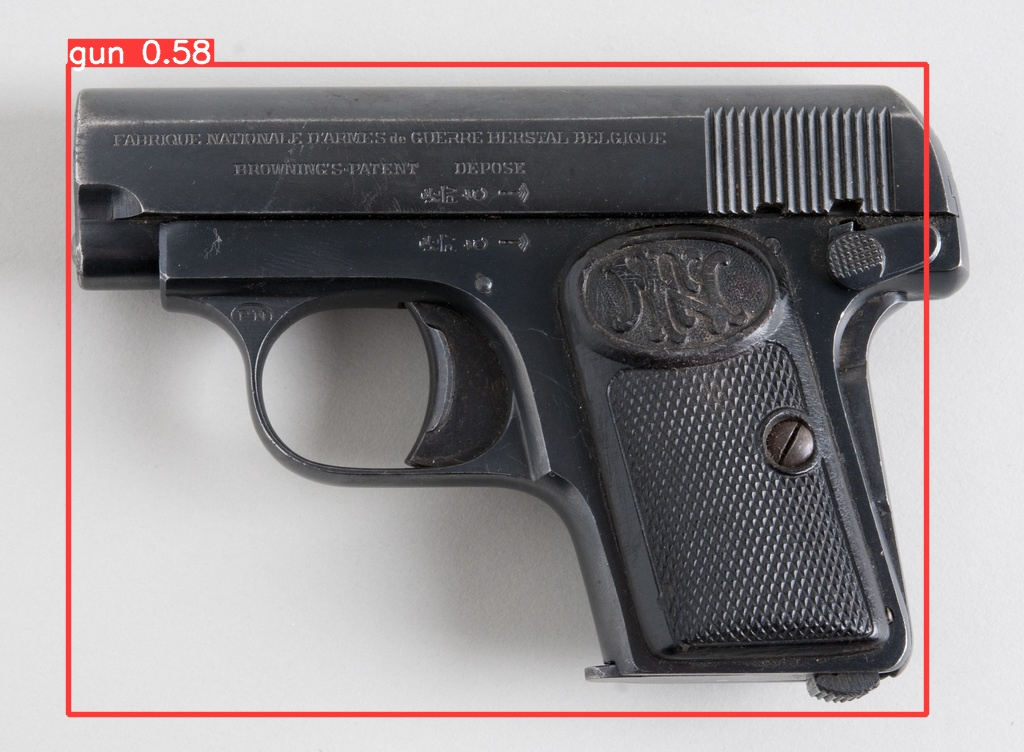

In [ ]:
Image(filename="runs/detect/exp3/0d3f3f4e0634026b.jpg", width=600)

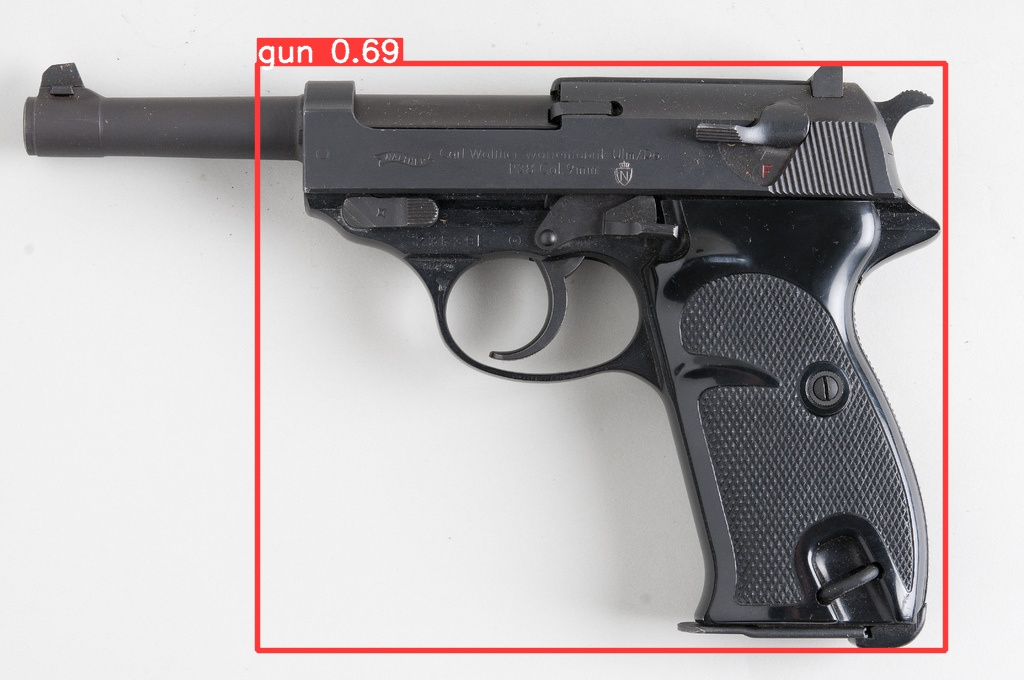

In [ ]:
Image(filename="runs/detect/exp3/078137c87ab2c4d0.jpg", width=600)

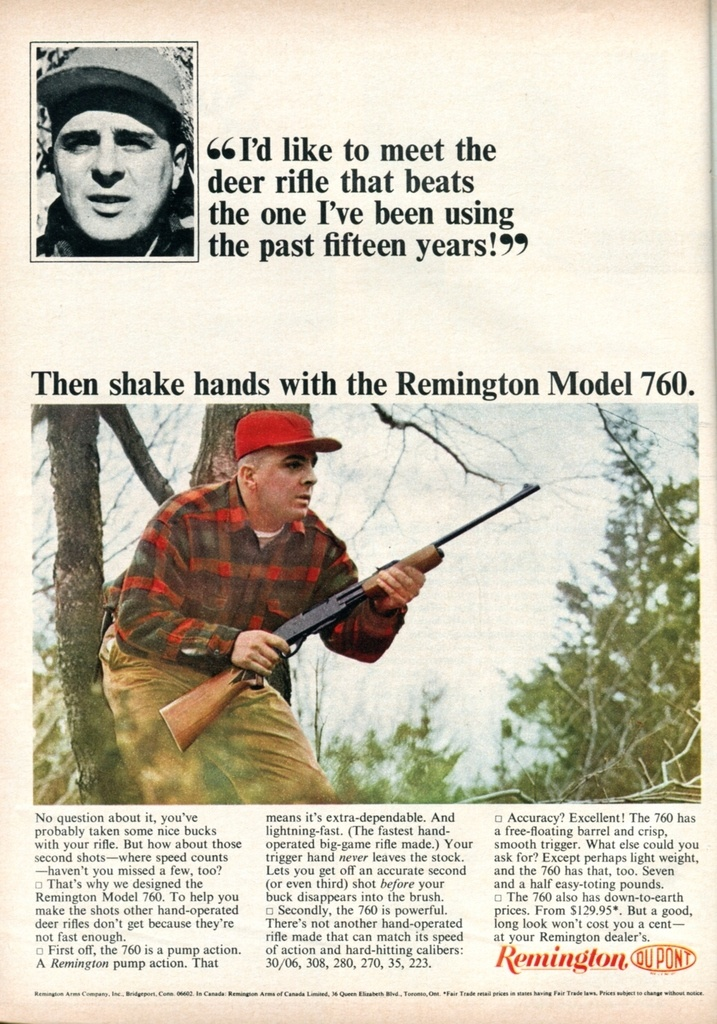

In [ ]:
Image(filename="runs/detect/exp3/f196269dcce54ad5c.jpg", width=600)

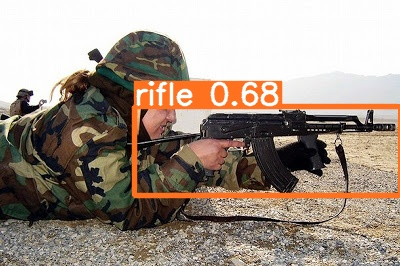

In [ ]:
Image(filename='runs/detect/exp3/i1mage13.jpg', width=600)

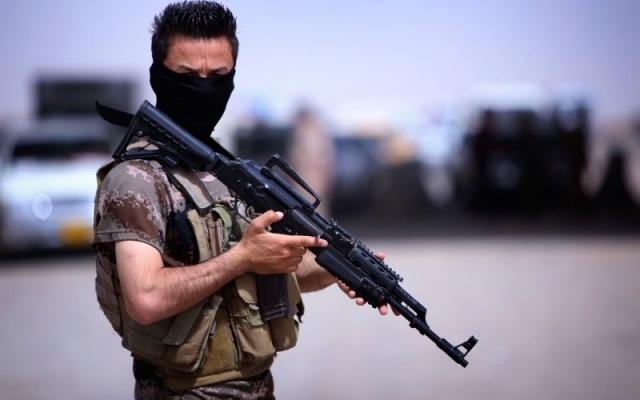

In [ ]:
Image(filename='runs/detect/exp3/i1mage20.jpg', width=600)

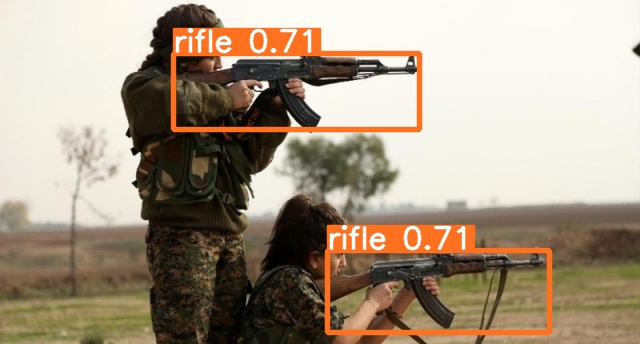

In [ ]:
Image(filename='runs/detect/exp3/i1mage21.jpg', width=600)

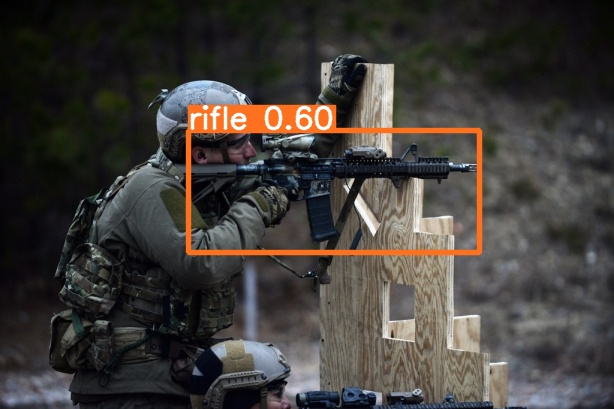

In [ ]:
Image(filename='runs/detect/exp3/i1mage187.jpg', width=600)